In [26]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/ColabNotebooks/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip3 install konlpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 453 kB 45.8 MB/s 


# 영화 리뷰 데이터 다운로드

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", sep = "\t")
test = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", sep = "\t")
print(train.shape)
print(test.shape)

(150000, 3)
(50000, 3)


In [3]:
train.head(5)
# label 1: 긍정(재밌다)
# label 0: 부정(재미없다)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [4]:
# train 데이터의 결측치 확인 
train.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [5]:
# 결측치 삭제 후 확인
train.dropna(inplace=True)
print(train.shape)

(149995, 3)


# 리뷰 길이에 따른 긍정, 부정 데이터 출현 빈도수 비교

Text(0.5, 1.0, 'negative')

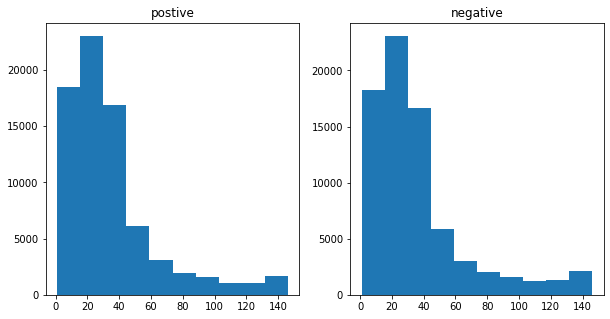

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))

# 긍정 리뷰
data_1 = train[train["label"] == 1]["document"].str.len()
ax1.hist(data_1)
ax1.set_title("postive")

# 부정 리뷰
data_2 = train[train["label"] == 0]["document"].str.len()
ax2.hist(data_2)
ax2.set_title("negative")

# 형태소 분석, 토크나이징, 문장을 벡터로 변환

In [7]:
from konlpy.tag import Okt

okt = Okt()
def word_tokenization(text):
    stop_words = ["는", "을", "를", '이', '가', '의', '던', '고', '하', '다', '은', '에', '들', '지', '게', '도'] # 한글 stop words
    return [word for word in okt.morphs(text) if word not in stop_words] # okt.morphs를 통해 문장을 형태소 단위로 나누고 stop_words에 없으면 list에 추가 후 반환

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html
# apply 를 이용해 dataframe에 word_tokenization 함수를 적용한다. 
data = train["document"].apply((lambda x: word_tokenization(x)))
data.head(10)

0                          [아, 더빙, .., 진짜, 짜증나네요, 목소리]
1    [흠, ..., 포스터, 보고, 초딩, 영화, 줄, ...., 오버, 연기, 조차,...
2                     [너, 무재, 밓었, 다그, 래서, 보는것을, 추천, 한]
3          [교도소, 이야기, 구먼, .., 솔직히, 재미, 없다, .., 평점, 조정]
4    [사이, 몬페, 그, 익살스런, 연기, 돋보였던, 영화, !, 스파이더맨, 에서, ...
5    [막, 걸음, 마, 뗀, 3, 세, 부터, 초등학교, 1, 학년, 생인, 8, 살용...
6                         [원작, 긴장감, 제대로, 살려내지못, 했다, .]
7    [별, 반개, 아깝다, 욕, 나온다, 이응경, 길용우, 연, 기, 생활, 몇, 년,...
8                       [액션, 없는데도, 재미, 있는, 몇, 안되는, 영화]
9    [왜케, 평점, 낮은건데, ?, 꽤, 볼, 만, 한, 데, .., 헐리우드, 식, ...
Name: document, dtype: object

In [9]:
# keras에 있는 모듈을 사용하여 토크나이징
# 토크나이징 : {단어:숫자}로 이루어진 사전 생성. 같은 단어는 동일한 인덱스에 지정된다. 

from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)

tokenizer.word_index

{'.': 1,
 '영화': 2,
 '..': 3,
 '...': 4,
 ',': 5,
 '너무': 6,
 '?': 7,
 '한': 8,
 '정말': 9,
 '적': 10,
 '만': 11,
 '!': 12,
 '진짜': 13,
 '점': 14,
 '으로': 15,
 '로': 16,
 '에서': 17,
 '연기': 18,
 '과': 19,
 '평점': 20,
 '것': 21,
 '최고': 22,
 '내': 23,
 '~': 24,
 '나': 25,
 '그': 26,
 '잘': 27,
 '와': 28,
 '안': 29,
 '인': 30,
 '이런': 31,
 '스토리': 32,
 '생각': 33,
 '못': 34,
 '....': 35,
 '왜': 36,
 '드라마': 37,
 '이다': 38,
 '감동': 39,
 '사람': 40,
 '1': 41,
 '하는': 42,
 '보고': 43,
 '하고': 44,
 '말': 45,
 '아': 46,
 '더': 47,
 '때': 48,
 'ㅋㅋ': 49,
 '배우': 50,
 '거': 51,
 '감독': 52,
 '그냥': 53,
 '요': 54,
 '본': 55,
 '재미': 56,
 '내용': 57,
 '뭐': 58,
 '중': 59,
 '까지': 60,
 '!!': 61,
 '좀': 62,
 '쓰레기': 63,
 '보다': 64,
 '없는': 65,
 '시간': 66,
 '수': 67,
 '네': 68,
 '봤는데': 69,
 '10': 70,
 '작품': 71,
 '사랑': 72,
 '할': 73,
 '없다': 74,
 '다시': 75,
 '하나': 76,
 '볼': 77,
 '마지막': 78,
 '이건': 79,
 'ㅋ': 80,
 '좋은': 81,
 '저': 82,
 '정도': 83,
 '입니다': 84,
 '같은': 85,
 '완전': 86,
 '있는': 87,
 '2': 88,
 'ㅋㅋㅋ': 89,
 '처음': 90,
 '장면': 91,
 '액션': 92,
 '주인공': 93,
 '대': 94,
 '걸'

In [11]:
tokenizer.word_counts # fit하는 동안 단어가 출현한 빈도

OrderedDict([('아', 4373),
             ('더빙', 573),
             ('..', 29058),
             ('진짜', 8343),
             ('짜증나네요', 22),
             ('목소리', 375),
             ('흠', 264),
             ('...', 22801),
             ('포스터', 573),
             ('보고', 4702),
             ('초딩', 424),
             ('영화', 50737),
             ('줄', 1240),
             ('....', 5200),
             ('오버', 142),
             ('연기', 6434),
             ('조차', 242),
             ('가볍지', 26),
             ('않구나', 3),
             ('너', 687),
             ('무재', 69),
             ('밓었', 1),
             ('다그', 24),
             ('래서', 17),
             ('보는것을', 10),
             ('추천', 1193),
             ('한', 11003),
             ('교도소', 16),
             ('이야기', 2174),
             ('구먼', 11),
             ('솔직히', 1069),
             ('재미', 3930),
             ('없다', 2868),
             ('평점', 6324),
             ('조정', 40),
             ('사이', 219),
             ('몬페', 2),
             ('그', 5672

In [12]:
# 7회 이상 출현한 단어의 개수 세기
count = 0 
for i in tokenizer.word_counts.values():# 각각의 단어가 출현하는 빈도
  if i >= 7:
    count = count + 1

count

17686

In [13]:
# 문자를 숫자로 표현한다. 
# 각 문장을 벡터로 변환
train_sequence = tokenizer.texts_to_sequences(data)

In [15]:
# 학습시 가변길이 대신에 고정길이 input을 집어 넣어 학습시키기 위하여
# 데이터 중 가장 길이가 긴 문장의 길이를 확인
max(len(x) for x in train_sequence)

93

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences

max_length = 40 # 40으로 지정하여 학습시킨다. 
# 긴문장 -> 짤라준다.
# 짧은 문장 -> padding을 추가
# 문장의 길이를 동일하게 맞춰준다.
trun = "post"
padd = "post"

train_padded = pad_sequences(train_sequence, truncating=trun, padding= padd, maxlen=max_length)
print(train_padded.shape) # 학습시킬 데이터

train_labels = np.asarray(train["label"])
print(train_labels.shape) # 정답 데이터

(149995, 40)
(149995,)


In [17]:
train_padded[1]

array([  926,     4,   457,    43,   620,     2,   202,    35,  1611,
          18,  1003,  6307, 26875,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0], dtype=int32)

# 모델 생성 및 학습

In [18]:
# 모델 생성
# 임베딩 레이어
# 양방향 LSTM layer
# dense layer 2개

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(count, 300, input_length=max_length))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, return_sequences=False, input_shape=(40,1))))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 300)           5305800   
                                                                 
 bidirectional (Bidirectiona  (None, 100)              140400    
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                3232      
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 5,449,498
Trainable params: 5,449,498
Non-trainable params: 0
_________________________________________________________________


In [19]:
# fitting
model.fit(train_padded, train_labels, validation_split=0.2, batch_size = 128, epochs = 4)

Epoch 1/4
938/938 [==============================] - 25s 12ms/step - loss: 0.3760 - accuracy: 0.8284 - val_loss: 0.3302 - val_accuracy: 0.8552
Epoch 2/4
938/938 [==============================] - 10s 11ms/step - loss: 0.2722 - accuracy: 0.8819 - val_loss: 0.3296 - val_accuracy: 0.8590
Epoch 3/4
938/938 [==============================] - 10s 11ms/step - loss: 0.2153 - accuracy: 0.9077 - val_loss: 0.3698 - val_accuracy: 0.8547
Epoch 4/4
938/938 [==============================] - 11s 11ms/step - loss: 0.1647 - accuracy: 0.9304 - val_loss: 0.4255 - val_accuracy: 0.8455


# 리뷰를 입력받아 긍정, 부정 판단하게 하기

In [35]:
test_text = input('영화 후기를 입력하세요!: ')

# stop words 제거하며 tokenizing
test_data = word_tokenization(test_text)

# 벡터로 변환
test_vector = [np.array(tokenizer.texts_to_sequences(test_data))[:, 0]]

# 패딩 처리
test_padded = pad_sequences(test_vector, truncating=trun, padding= padd, maxlen=max_length)

output = model.predict(test_padded)

if output[0][0] > output[0][1]:
  print(f"{round(output[0][0]*100, 2)}의 확률로 부정 리뷰입니다.")
else:
  print(f'{round(output[0][1]*100, 2)}의 확률로 긍정 리뷰입니다.')

영화 후기를 입력하세요!: 역대급이다
92.2의 확률로 긍정 리뷰입니다.


# 네이버 영화 리뷰 데이터를 크롤링해와서 모델 추가 학습

In [28]:
# 네이버 영화 리뷰 페이지를 크롤링하는 함수
def collect_reviews(url_num):
    table_pd = pd.read_html(f'https://movie.naver.com/movie/point/af/list.naver?&page={url_num}')[0]
    df = pd.DataFrame(columns=["번호", "제목", "평점", "감상평"])
    
    for i in range(10):
        try: # 에러에 대비하여 예외 처리
            index = table_pd["번호"][i]
            name = table_pd["감상평"][i].split("  별점 - 총 10점 중")[0]
            score = table_pd["감상평"][i].split("  별점 - 총 10점 중")[1][:-3].split("  ")[0]
            review = table_pd["감상평"][i].split("  별점 - 총 10점 중")[1][:-3].split("  ")[1]

            df = df.append({"번호":int(index), "제목":str(name), "평점":int(score), "감상평":str(review)}, ignore_index=True)
        except:
            pass
    
    return df


import multiprocessing
from multiprocessing import Pool

pool = Pool(processes=10) # 10개의 프로세스를 이용해서 작업을 동시에 처리
result = pool.map(collect_reviews, range(0, 1000)) # 1000페이지 크롤링
pd.concat(result, axis=0).reset_index().to_csv(f"{datetime.datetime.now()}.csv") # csv 파일로 저장

In [39]:
def data_preprocessing(csv_path):
  data_set = pd.read_csv(csv_path) #c sv 파일 불러오기
  data_set = data_set.dropna()
  train = pd.DataFrame() # data_set 에 필요한 데이터만 추출해 train df 에 저장한다. 
  train["document"] = data_set["감상평"]
  train["label"] = data_set["평점"]
  return train


def score(x): # 평점 7점 이상은 1, 평점 7점 미만은 0으로 labeling
  if x >= 7:
    return 1
  else:
    return 0


def score_review():
  test_input = input("리뷰를 입력하세요 : ") # 단어입력
  tmp = word_tokenization(test_input) # 단어 -> token
  word_vec = [list(np.array(tokenizer.texts_to_sequences(tmp))[:, 0])] # token -> vec
  test_padded = pad_sequences(word_vec, truncating=trun, padding= padd, maxlen=max_length) # padding 추가
  result = model.predict(test_padded) # predict

  if output[0][0] > output[0][1]:
    print(f"{round(result[0][0]*100, 2)}의 확률로 부정 리뷰입니다.")
  else:
    print(f'{round(result[0][1]*100, 2)}의 확률로 긍정 리뷰입니다.')


train = data_preprocessing("2022-06-12 13:26:19.900077.csv")
data = train["document"].apply((lambda x : word_tokenization(x)))
train_sequences = tokenizer.texts_to_sequences(data) # tokenizer를 이용해 토큰으로 변경
train_padded = pad_sequences(train_sequences, truncating=trun, padding= padd, maxlen=max_length) # padding 처리

train_labels = train["label"].apply(score)
train_labels = np.array(train_labels)

# 크롤링한 데이터를 사용하여 모델 추가 학습 
model.fit(train_padded, train_labels, validation_split=0.2, batch_size = 128, epochs = 10)

Epoch 1/10
59/59 [==============================] - 1s 18ms/step - loss: 0.1166 - accuracy: 0.9589 - val_loss: 0.4818 - val_accuracy: 0.8417
Epoch 2/10
59/59 [==============================] - 1s 16ms/step - loss: 0.0485 - accuracy: 0.9843 - val_loss: 0.6584 - val_accuracy: 0.8310
Epoch 3/10
59/59 [==============================] - 1s 11ms/step - loss: 0.0208 - accuracy: 0.9951 - val_loss: 0.8226 - val_accuracy: 0.8342
Epoch 4/10
59/59 [==============================] - 1s 11ms/step - loss: 0.0097 - accuracy: 0.9976 - val_loss: 0.9176 - val_accuracy: 0.8358
Epoch 5/10
59/59 [==============================] - 1s 11ms/step - loss: 0.0051 - accuracy: 0.9989 - val_loss: 1.0212 - val_accuracy: 0.8342
Epoch 6/10
59/59 [==============================] - 1s 11ms/step - loss: 0.0035 - accuracy: 0.9988 - val_loss: 1.0753 - val_accuracy: 0.8300
Epoch 7/10
59/59 [==============================] - 1s 11ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 1.1404 - val_accuracy: 0.8289
Epoch 8/10
59